# Import libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load CSV

In [5]:
df = pd.read_csv(r"D:\rockfall\rockfall_timeseries_flat.csv")

X = df.drop(["failure_label", "sequence_id"], axis=1).values
y = df["failure_label"].values 

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create sequences

In [7]:
# Reshape for CNN: (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# LSTM Model

In [8]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation="relu"),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")   # Binary classification
])

# Step 7: Compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6155 - loss: 0.6686 - val_accuracy: 0.6160 - val_loss: 0.6628
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6159 - loss: 0.6608 - val_accuracy: 0.6186 - val_loss: 0.6541
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6225 - loss: 0.6536 - val_accuracy: 0.6346 - val_loss: 0.6421
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6310 - loss: 0.6420 - val_accuracy: 0.6493 - val_loss: 0.6213
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6399 - loss: 0.6313 - val_accuracy: 0.6539 - val_loss: 0.6108
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6491 - loss: 0.6178 - val_accuracy: 0.6688 - val_loss: 0.5976
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6528 - loss: 0.6101 - val_accuracy: 0.6702 - val_loss: 0.5881
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6548 - loss: 0.6016 - 

# Predictions

In [10]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
✅ Accuracy: 0.7623

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83      6160
           1       0.80      0.51      0.62      3840

    accuracy                           0.76     10000
   macro avg       0.77      0.72      0.72     10000
weighted avg       0.77      0.76      0.75     10000



#  Plot


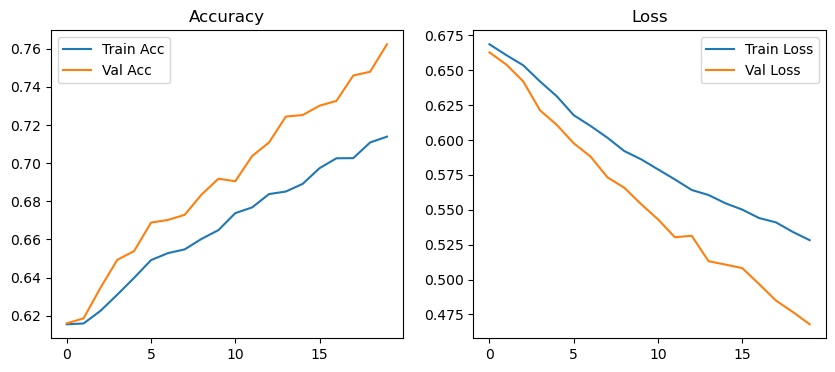

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")
plt.show()

# Confusion Matrix

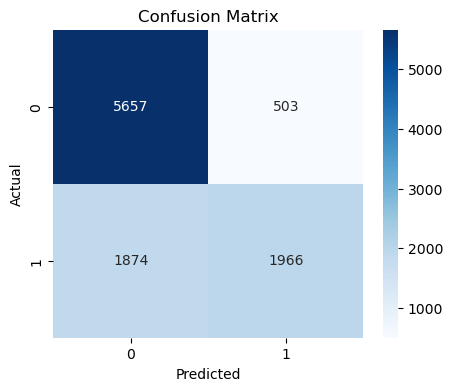

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()